<a href="https://colab.research.google.com/github/praveenraghuvanshi1512/EVA4/blob/Session-12/Session-12/Assignment-12/Assignment-12-A/EVA_4_S12_A_Praveen_Raghuvanshi_Main_51_77_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Steps Summary

In [0]:
# 1. Mount google drive
# 2. Set the directory path of google drive
# 3. Load and Import all modules and libraries
# 4. Set Device
# 5. Import all the functions
# 6. Load transformations
# 7. Load dataset
# 8. Load Classes
# 9. Display sample images
# 10. Load Resnet18 Model
# 11. Define Loss function and optimizer
# 12. Run train and test
# 13. Grad-CAM
# 14. Misclassified images

### 1. Mount google drive

In [2]:
# Load data from Google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### 2. Set the directory path of google drive

In [0]:
import sys

%load_ext autoreload
%autoreload 2

BASE_COLAB_PATH = '/content/drive/My Drive/eva-4/assignment-12/assignment-12-A/' 

sys.path.append(BASE_COLAB_PATH)
sys.path.append(BASE_COLAB_PATH + 'models')
sys.path.append(BASE_COLAB_PATH + 'gradcam')
sys.path.append(BASE_COLAB_PATH + 'sampleimages')
sys.path.append(BASE_COLAB_PATH + 'misclassified')

In [4]:
cd '/content/drive/My Drive/eva-4/assignment-12/assignment-12-A'

/content/drive/My Drive/eva-4/assignment-12/assignment-12-A


In [5]:
ls

augmentation.py                                           metrics.png
CODE_ONLY_EVA_4_S11_Praveen_Raghuvanshi_Main_91_04.ipynb  models/
EVA_4_S12_Praveen_Raghuvanshi_Main.ipynb                  plotutils.py
gradcam/                                                  __pycache__/
IMagenet/                                                 S12_functions.py
learningrate.py                                           utils.py


### 3. Load and Import all modules and libraries

In [6]:
!pip install torchsummary

In [7]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-hpp94_o9
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-hpp94_o9
     |████████████████████████████████| 634kB 6.3MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65099 sha256=bb0bc3ac363683668946b6655dec6ef26d88e3c9cbc915db311f5ff8dfdabb62
  Stored in directory: /tmp/pip-ephem-wheel-cache-to17mhb0/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=5fa18e7cbb4ea8241a12deec5d0f5b13d7bc161272fb0f9933e261ece8712e05
  Stored in directory: /tmp/pip-ephem-wheel-cache-to17mhb0/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: album

In [8]:
!pip install torch-lr-finder -v --global-option="amp"

/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-ak8p2io6
Created temporary directory: /tmp/pip-req-tracker-q72mrthp
Created requirements tracker '/tmp/pip-req-tracker-q72mrthp'
Created temporary directory: /tmp/pip-install-hpkvom_a
1 location(s) to search for versions of torch-lr-finder:
* https://pypi.org/simple/torch-lr-finder/
Getting page https://pypi.org/simple/torch-lr-finder/
Found index url https://pypi.org/simple
Looking up "https://pypi.org/simple/torch-lr-finder/" in the cache
Request header has "max_age" as 0, cache bypassed
Starting new HTTPS connection (1): pypi.org:443
https://pypi.org:443 "GET /simple/torch-lr-finder/ HTTP/1.1" 200 1168
Updating cache with response from "https://pypi.org/simple/torch-lr-finder/"
Caching due 

In [0]:
import os.path
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

from os import path
from torchvision.utils import make_grid
from torchsummary import summary

In [0]:
# Define hyper paramteres and constants
EPOCHS=50
BATCH_SIZE=512
IMAGENET_ROOT_DIR = BASE_COLAB_PATH + 'IMagenet/tiny-imagenet-200/'
IMAGENET_TRAIN_SET_DIR = "train_set"
IMAGENET_TEST_SET_DIR = "test_set"
IMAGENET_TRAIN_SET_DIR_PATH = IMAGENET_ROOT_DIR + IMAGENET_TRAIN_SET_DIR
IMAGENET_TEST_SET_DIR_PATH = IMAGENET_ROOT_DIR + IMAGENET_TEST_SET_DIR

trainaccuracies = []
trainlosses = []
testlosses = []
testaccuracies = []
lr_values = []

### 4. Set Device

In [11]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


###  5. Import all the functions

In [0]:
from model import Net, ResNet, resnet18
from s11model import S11Model
from S12_functions import myfunc, transformations, loadcifar10dataset, getclasses, display, train, test, imshow, loadimage, saveimage
from S12_functions import loadimagenetdataset, splittinyimagedataset, getloss, getoptimizer, getscheduler
from gradcam import GradCAM, GradCAMpp, applygradcam
from gradcam_utils import Normalize, visualize_cam
from learningrate import findandplotlearningrate, plotCyclicLR, performLRRangeTest, getSchdeduler, getlr
from plotutils import plotimages, showbatchimages, plotmisclassifiedimages, savemisclassifiedimages, plotmisclassifiedgradcamimages, plotmetrics 

###  6. Load Transformations

In [0]:
transform_train, transform_test = transformations()

###  7. Load Dataset

In [16]:
if not path.exists(IMAGENET_TRAIN_SET_DIR_PATH):
  ! git clone https://github.com/seshuad/IMagenet 
  ! ls 'IMagenet/tiny-imagenet-200/'
  os.chdir(BASE_COLAB_PATH + 'IMagenet/')
  splittinyimagedataset()

print(path.exists(IMAGENET_TRAIN_SET_DIR_PATH))

True


In [17]:
!pwd
os.chdir('/content/drive/My Drive/eva-4/assignment-12/assignment-12-A/IMagenet/tiny-imagenet-200/')
!pwd

/content/drive/My Drive/eva-4/assignment-12/assignment-12-A
/content/drive/My Drive/eva-4/assignment-12/assignment-12-A/IMagenet/tiny-imagenet-200


In [18]:
trainset, trainloader, testset, testloader = loadimagenetdataset(train_dir=IMAGENET_TRAIN_SET_DIR, test_dir=IMAGENET_TEST_SET_DIR, transform_train=transform_train, transform_test=transform_test, batch_size=BATCH_SIZE)
print(trainloader)

Preparing data loaders ...


### 9. Display sample images

###### Sample Training Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


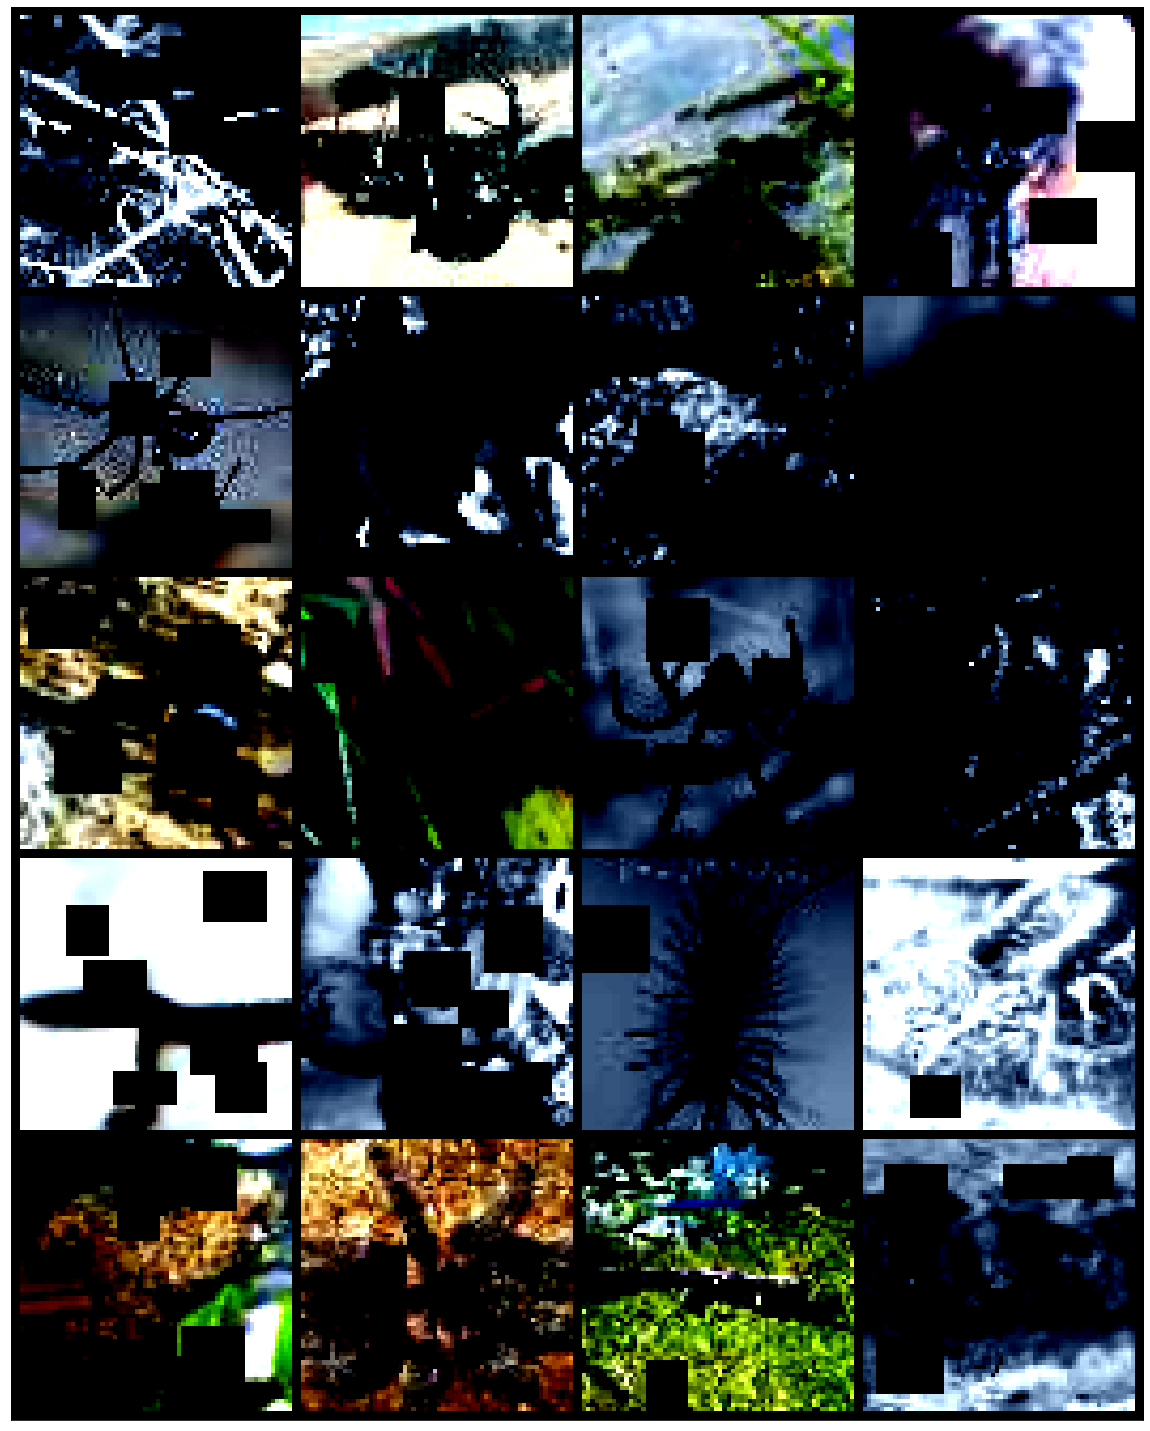

In [19]:
showbatchimages(dataloader=trainloader, numofimages=20, imagesperow=4)

###### Sample Test Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


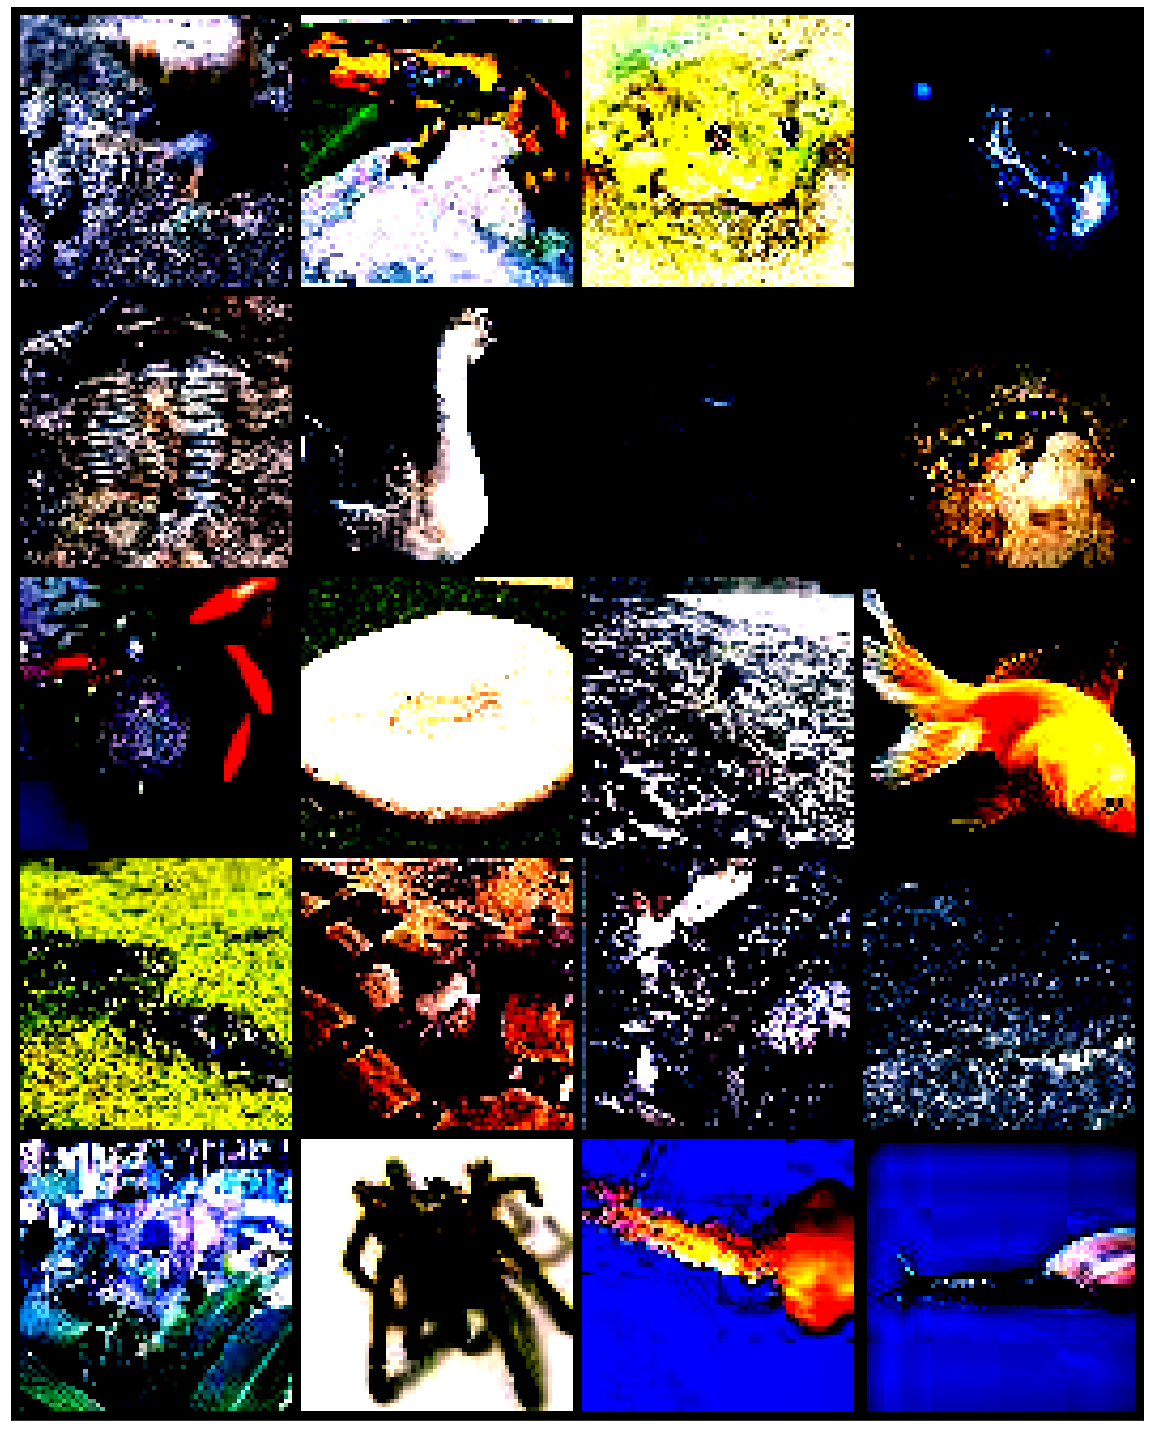

In [20]:
showbatchimages(dataloader=testloader, numofimages=20, imagesperow=4)

### 10. Load Resnet18 Model


In [21]:
print("Building Model")
net = resnet18(numberofClasses=200)

Building Model


In [22]:
# Display Model Summary
model = net.to(device)
summary(model, input_size=(3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           9,408
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
         MaxPool2d-4           [-1, 64, 16, 16]               0
            Conv2d-5           [-1, 64, 16, 16]          36,864
       BatchNorm2d-6           [-1, 64, 16, 16]             128
              ReLU-7           [-1, 64, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          36,864
       BatchNorm2d-9           [-1, 64, 16, 16]             128
             ReLU-10           [-1, 64, 16, 16]               0
       BasicBlock-11           [-1, 64, 16, 16]               0
           Conv2d-12           [-1, 64, 16, 16]          36,864
      BatchNorm2d-13           [-1, 64, 16, 16]             128
             ReLU-14           [-1, 64,

### 11. Define loss function and optimizer


In [0]:
criterion = getloss()

#### Find Learning Rate

In [0]:
optimizer = getoptimizer(model, lr=1e-7, momentum=0.9, nesterov=True, weight_decay=0.005)

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


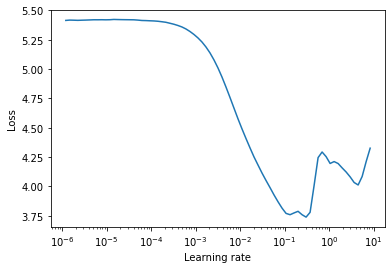

0.301995


In [25]:
max_lr = performLRRangeTest(model, optimizer, criterion, device, trainloader, end_lr=100, num_iter=100)

In [26]:
# scheduler = getSchdeduler(optimizer, max_lr = max_lr, epochs=EPOCHS, steps_per_epoch=1, pct_start=0.4)
scheduler = getSchdeduler(optimizer, max_lr = max_lr, total_steps=EPOCHS, epochs=None, steps_per_epoch=None, pct_start=0.2)
print("start LR ",scheduler.get_lr())
print("Total no of steps:", scheduler.total_steps)
print("No. of steps to increase LR -", scheduler.step_size_up)
print("No. of steps to reduce LR - ", scheduler.step_size_down)

start LR  [0.0301995]
Total no of steps: 50
No. of steps to increase LR - 9.0
No. of steps to reduce LR -  40.0


### 12. Run Train and Test

In [27]:
for epoch in range(1, EPOCHS + 1):
    epochlr = getlr(optimizer)
    print("\nEPOCH:", epoch,'LR:',epochlr)
    lr_values.append(epochlr)
 
    train(model, trainloader, device, optimizer, criterion, trainaccuracies, trainlosses, epoch)
    scheduler.step()
    testloss = test(model, testloader, device, criterion, testaccuracies, testlosses, epoch)


EPOCH: 1 LR: 0.0301995

Epoch: 1
 [===========================================================>.....]  Step: 699ms | Tot: 12s474ms | Train >> Loss: 3.270 | Acc: 7.929% (427/5385) 11/11 
 [======================================================>..........]  Step: 86ms | Tot: 2m59s | Test >> Loss: 3.204 | Acc: 10.567% (298/2820) 6/6 

EPOCH: 2 LR: 0.060399

Epoch: 2
 [===========================================================>.....]  Step: 697ms | Tot: 12s535ms | Train >> Loss: 2.923 | Acc: 11.625% (626/5385) 11/11 
 [======================================================>..........]  Step: 70ms | Tot: 2s567ms | Test >> Loss: 35.321 | Acc: 5.887% (166/2820) 6/6 

EPOCH: 3 LR: 0.0905985

Epoch: 3
 [===========================================================>.....]  Step: 679ms | Tot: 12s495ms | Train >> Loss: 2.730 | Acc: 14.633% (788/5385) 11/11 
 [======================================================>..........]  Step: 70ms | Tot: 2s553ms | Test >> Loss: 2.966 | Acc: 16.738% (472/2820

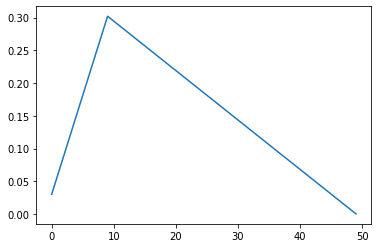

In [28]:
plt.plot(lr_values)

#### Plot Metrics - Accuracy and Loss

50
50


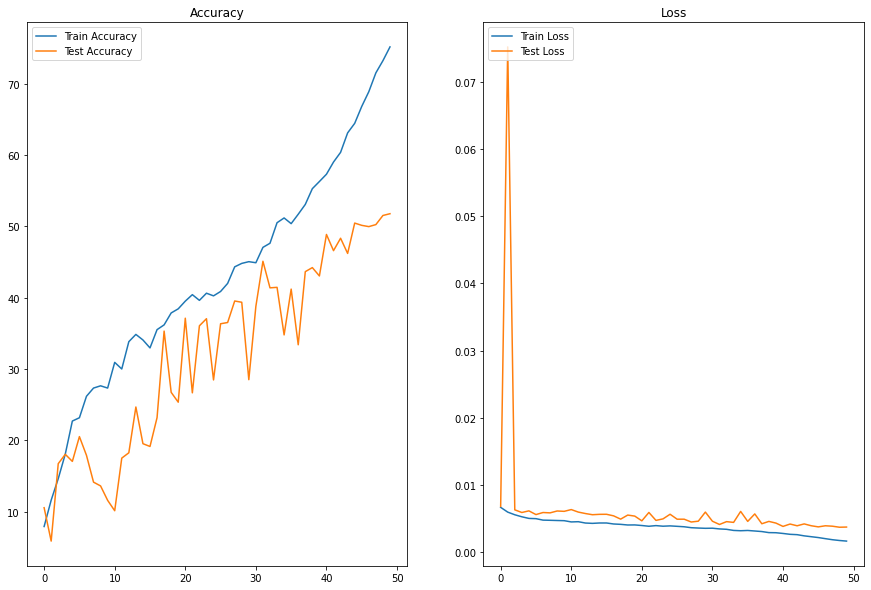

In [29]:
plotmetrics(trainaccuracies, testaccuracies, trainlosses, testlosses, savefilename="metrics")

### 14. Misclassified images

#### Get Misclassified Images

In [0]:
misclassifieddirectory = '/content/drive/My Drive/eva-4/assignment-12/assignment-12-A/misclassified'
names, titles = savemisclassifiedimages(model, device, classes, testloader, misclassifieddirectory, 25)

### 15. Analysis
- No of Epochs : 50
- Batch size : 512
- Best Test  Acc: 51.773% {Epoch-49)
- Model: ResNet18
- Albumentations: Yes
- Hyperparameters
  - Optimizer: SGD
  - Learning rate: 0.03
  - Momentum: 0.9
  - Scheduler: One Cycle Policy